In [29]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
data = pd.read_csv('DATABASE_GESTANTES.csv')
#data.head(100)

0    32
1    14
Name: Class, dtype: int64

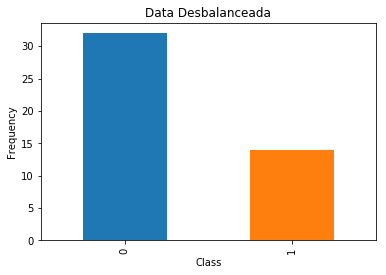

In [67]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Data Desbalanceada')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [68]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (46, 14)
Shape of y: (46, 1)


In [69]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (34, 14)
Number transactions y_train dataset:  (34, 1)
Number transactions X_test dataset:  (12, 14)
Number transactions y_test dataset:  (12, 1)


In [70]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

#print(X_train_res)
#print(y_train_res)

Before OverSampling, counts of label '1': [10]
Before OverSampling, counts of label '0': [24] 

After OverSampling, the shape of train_X: (48, 14)
After OverSampling, the shape of train_y: (48,) 

After OverSampling, counts of label '1': 24
After OverSampling, counts of label '0': 24 



In [71]:
header = ['EDAD','LUGAR_NACIMIENTO','EDUCACION','OCUPACION','ESTADO_CIVIL','TIPO_SEGURO','CANTIDAD_EMBARAZOS',
          'CANTIDAD_HIJOS','MENARQUIA_EDAD','DURACION_MENSTRUACION','TALLA','PESO','INDICE_MASA_CORPORAL',
          'TIPO_SOCIOECONOMICO']
 
df = pd.DataFrame(X_train_res, columns=header)
df["Class"] = y_train_res
df.to_csv("DATA_BALANCED_GESTANTES.csv", sep=",", index=False, float_format="%.6f")

In [72]:
#df.head(100)

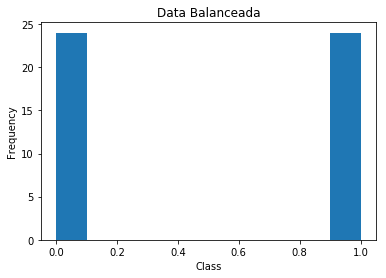

In [73]:
plt.title('Data Balanceada')
plt.hist(y_train_res)
plt.xlabel('Class')
plt.ylabel('Frequency') 
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    3.7s finished


{'C': 1.0}

In [75]:
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

In [76]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 80.0%
Confusion matrix, without normalization
[[20  4]
 [ 2  8]]


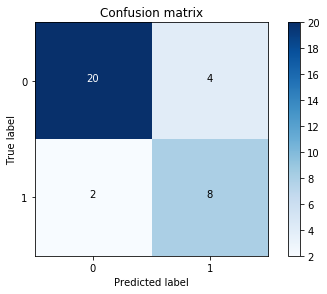

In [77]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 75.0%
Precision metric in the testing dataset: 85.71428571428571%
Confusion matrix, without normalization
[[6 2]
 [1 3]]


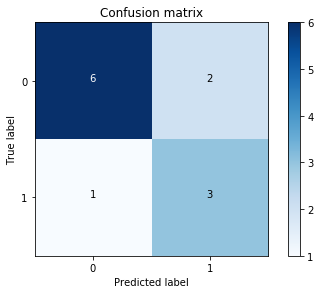

In [78]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [79]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


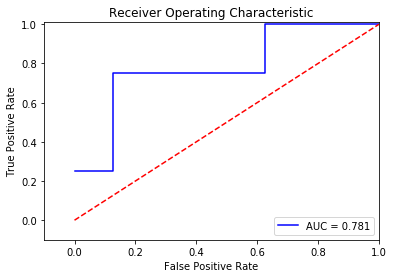

In [80]:
y_pred_sample_score = tmp.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
roc_auc

0.78125

1    24
0    24
Name: Class, dtype: int64

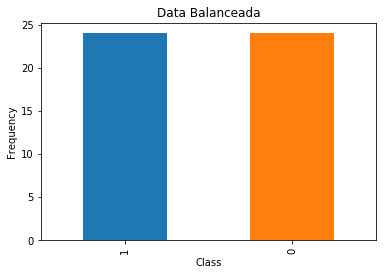

In [83]:
data = pd.read_csv('DATA_BALANCED_GESTANTES.csv')

pd.value_counts(data['Class']).plot.bar()
plt.title('Data Balanceada')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()